<a href="https://colab.research.google.com/github/Man2Dev/colab/blob/master/MainProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import the dataset**

In [10]:
from google.colab import files
uploaded = files.upload()

Saving alcohol.csv to alcohol.csv


In [11]:
#import the dataset
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
dataset = pd.read_csv(io.BytesIO(uploaded['alcohol.csv']))

**Comparing TB incidence in Iran , India and Germany from 2000 to 2020 per 100,000 people**

<ipython-input-12-5fa721e3287f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_data[year_columns] = tb_data[year_columns].apply(pd.to_numeric, errors='coerce')


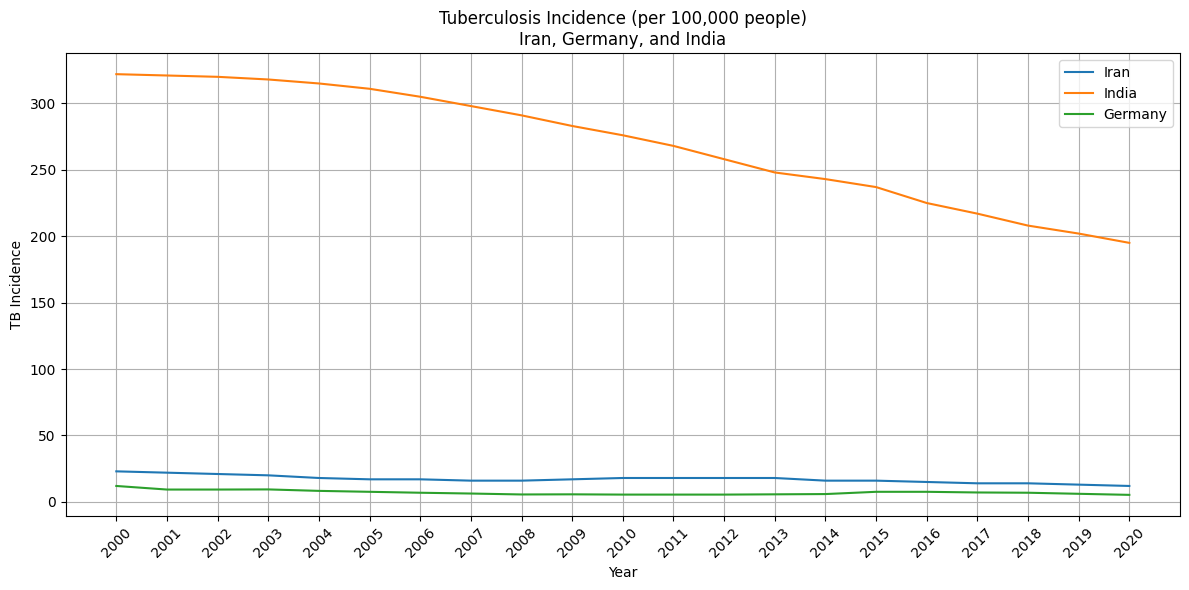

In [12]:
# Filter for TB incidence only
tb_data = dataset[dataset['Series Name'] == 'Incidence of tuberculosis (per 100,000 people)']

# Extract year columns and convert values to numeric
year_columns = tb_data.columns[2:]
tb_data[year_columns] = tb_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Filter for specific countries
countries_of_interest = ['Iran', 'Germany', 'India']
tb_selected = tb_data[tb_data['Country'].isin(countries_of_interest)]

# Clean year labels for x-axis
years_cleaned = [col.split()[0] for col in year_columns]

# Plotting
plt.figure(figsize=(12, 6))
for _, row in tb_selected.iterrows():
    plt.plot(years_cleaned, row[year_columns], label=row['Country'])

plt.title('Tuberculosis Incidence (per 100,000 people)\nIran, Germany, and India')
plt.xlabel('Year')
plt.ylabel('TB Incidence')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Comparing Alchohol incidence in Iran , India and Germany from 2000 to 2020 (liters of pure alcohol, projected estimates, 15+ years of age)**

<ipython-input-13-ce6a202b212d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_data[year_columns] = al_data[year_columns].apply(pd.to_numeric, errors='coerce')


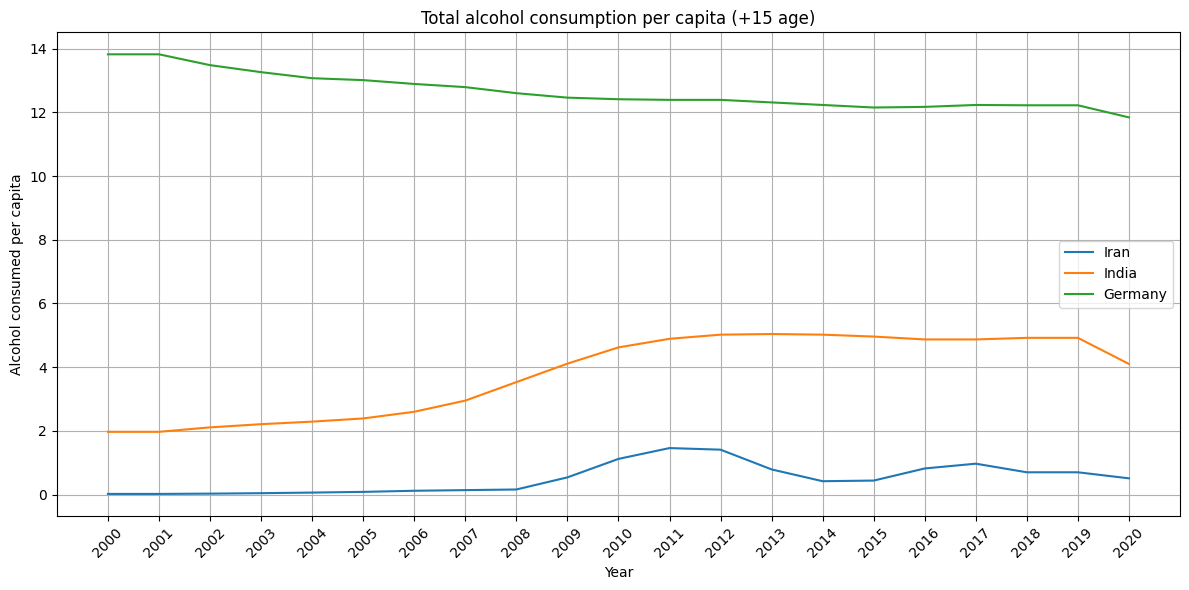

In [13]:

al_data = dataset[dataset['Series Name'] == 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']

# Extract year columns and convert values to numeric
year_columns = al_data.columns[2:]
al_data[year_columns] = al_data[year_columns].apply(pd.to_numeric, errors='coerce')

# Filter for specific countries
countries_of_interest = ['Iran', 'Germany', 'India']
al_selected = al_data[al_data['Country'].isin(countries_of_interest)]

# Clean year labels for x-axis
years_cleaned = [col.split()[0] for col in year_columns]

# Plotting
plt.figure(figsize=(12, 6))
for _, row in al_selected.iterrows():
    plt.plot(years_cleaned, row[year_columns], label=row['Country'])

plt.title('Total alcohol consumption per capita (+15 age)')
plt.xlabel('Year')
plt.ylabel('Alcohol consumed per capita')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Finding statistical values for Tuborculosis data for Iran**

In [14]:
tuberiran = dataset.iloc[0, 2:].values
# Ensure x is a NumPy array of floats
tuberiran = tuberiran.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in Iran")
# Calculate statistics
mean_valtubeiran = np.mean(tuberiran)
median_valtubeiran = np.median(tuberiran)
mode_valtubeiran = stats.mode(tuberiran, keepdims=True)[0][0]
iqr_valtubeiran = stats.iqr(tuberiran)
min_valtubeiran = np.min(tuberiran)
max_valtubeiran = np.max(tuberiran)
std_devtubeiran = np.std(tuberiran)
variancetubeiran = np.var(tuberiran)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeiran)
print("Minimum:", min_valtubeiran)
print("Maximum:", max_valtubeiran)
print("Standard Deviation:", std_devtubeiran)
print("Variance:", variancetubeiran)

Tuberculosis Incidence per 100,000 people in Iran
Interquartile Range (IQR): 2.0
Minimum: 12.0
Maximum: 23.0
Standard Deviation: 2.741302469452239
Variance: 7.514739229024944


**Visualizing statistical values for Tuborculosis data for Iran**

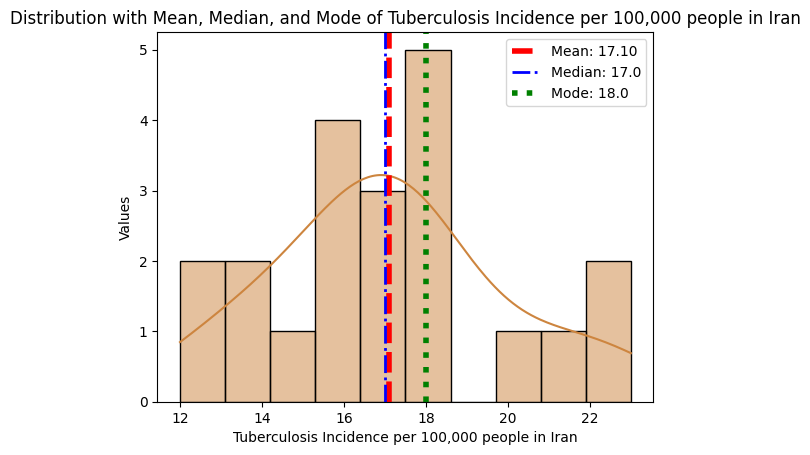

In [15]:
import seaborn as sns
sns.histplot(tuberiran, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_valtubeiran, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_valtubeiran:.2f}')
plt.axvline(median_valtubeiran, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_valtubeiran}')
plt.axvline(mode_valtubeiran, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_valtubeiran}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Tuberculosis Incidence per 100,000 people in Iran')
plt.xlabel('Tuberculosis Incidence per 100,000 people in Iran')
plt.ylabel('Values')
plt.show()

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


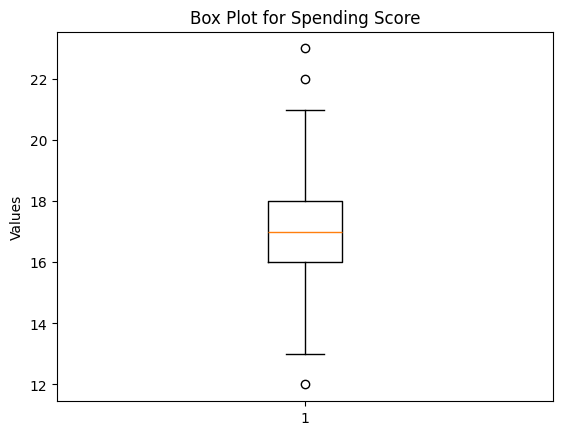

In [16]:
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(tuberiran)
plt.title("Box Plot for Spending Score")
plt.ylabel("Values")
plt.show()

**Finding statistical values for Tuborculosis data for India**

In [17]:
tuberindia = dataset.iloc[4, 2:].values
# Ensure x is a NumPy array of floats
tuberindia = tuberindia.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in Iran")
# Calculate statistics
mean_valtubeindia = np.mean(tuberindia)
median_valtubeindia = np.median(tuberindia)
mode_valtubeindia = stats.mode(tuberindia, keepdims=True)[0][0]
iqr_valtubeindia = stats.iqr(tuberindia)
min_valtubeindia = np.min(tuberindia)
max_valtubeindia = np.max(tuberindia)
std_devtubeindia = np.std(tuberindia)
variancetubeindia = np.var(tuberindia)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeindia)
print("Minimum:", min_valtubeindia)
print("Maximum:", max_valtubeindia)
print("Standard Deviation:", std_devtubeindia)
print("Variance:", variancetubeindia)

Tuberculosis Incidence per 100,000 people in Iran
Interquartile Range (IQR): 74.0
Minimum: 195.0
Maximum: 322.0
Standard Deviation: 42.45061155941935
Variance: 1802.0544217687075


**Visualizing statistical values for Tuborculosis data for India**

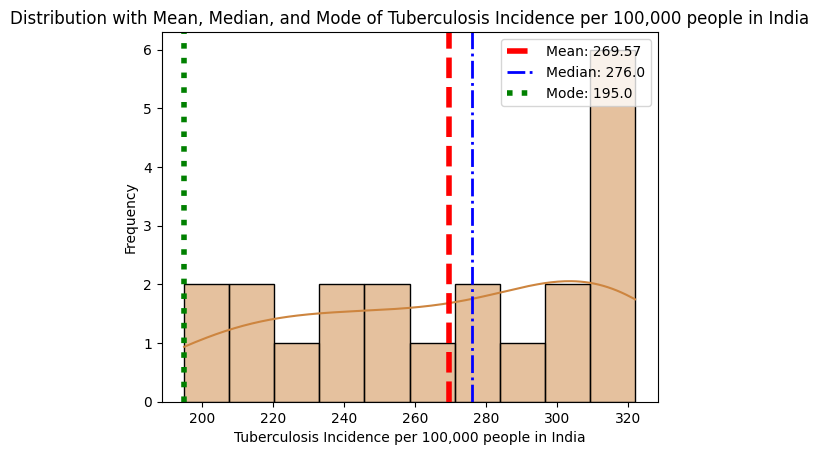

In [18]:
import seaborn as sns
sns.histplot(tuberindia, kde=True, color='peru', bins=10)
# Overlay mean, median, and mode
plt.axvline(mean_valtubeindia, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_valtubeindia:.2f}')
plt.axvline(median_valtubeindia, color='blue', linestyle='-.', linewidth=2, label=f'Median: {median_valtubeindia}')
plt.axvline(mode_valtubeindia, color='green', linestyle=':', linewidth=4, label=f'Mode: {mode_valtubeindia}')

# Add legend and labels
plt.legend()
plt.title('Distribution with Mean, Median, and Mode of Tuberculosis Incidence per 100,000 people in India')
plt.xlabel('Tuberculosis Incidence per 100,000 people in India')
plt.ylabel('Frequency')
plt.show()

 The orange line represents the median (50th percentile) 
 The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers


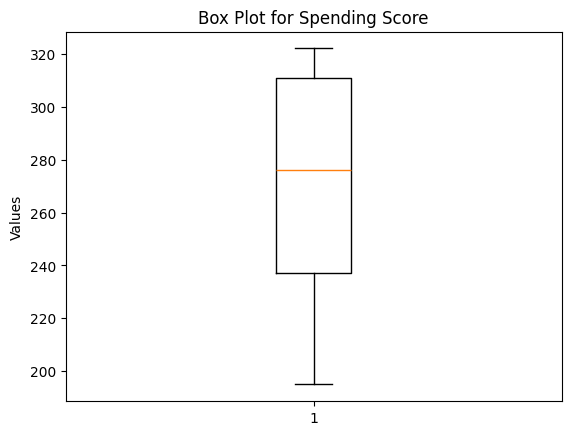

In [19]:
print(f"\033[1m The orange line represents the median (50th percentile) \033[0m")
print(f" The box extends from 25th percentile to 75th percentile while the whiskers are the potential outliers")
plt.boxplot(tuberindia)
plt.title("Box Plot for Spending Score")
plt.ylabel("Values")
plt.show()

**Finding statistical values for Tuborculosis data for Germany**

In [20]:
tuberGermany = dataset.iloc[8, 2:].values
# Ensure x is a NumPy array of floats
tuberindia = tuberindia.astype(float)
print(f"Tuberculosis Incidence per 100,000 people in Germany")
# Calculate statistics
mean_valtubeGermany = np.mean(tuberGermany)
median_valtubeGermany = np.median(tuberGermany)
mode_valtubeGermany = stats.mode(tuberGermany, keepdims=True)[1][1]
iqr_valtubeGermany = stats.iqr(tuberGermany)
min_valtubeGermany = np.min(tuberGermany)
max_valtubeGermany = np.max(tuberGermany)
std_devtubeGermany = np.std(tuberGermany)
variancetubeGermany = np.var(tuberGermany)

# Print results
print("Interquartile Range (IQR):", iqr_valtubeGermany)
print("Minimum:", min_valtubeGermany)
print("Maximum:", max_valtubeGermany)
print("Standard Deviation:", std_devtubeGermany)
print("Variance:", variancetubeGermany)

Tuberculosis Incidence per 100,000 people in Germany


TypeError: Argument `a` is not recognized as numeric. Support for input that cannot be coerced to a numeric array was deprecated in SciPy 1.9.0 and removed in SciPy 1.11.0. Please consider `np.unique`.